<a href="https://colab.research.google.com/github/lovemikassa/StatPrac/blob/main/DZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.

In [1]:
import numpy as np
from scipy import stats

def rng(m = 2**32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

samples = np.array([rng() for _ in range(1000)])
n_samples = samples.reshape(-1, 2)

k = 20
f_ob = np.histogram2d(n_samples[:, 0], n_samples[:, 1], bins = [np.linspace(0, 1, k + 1), np.linspace(0, 1, k + 1)])[0]
f_obs = f_ob.flatten()
f_exp = np.full_like(f_obs, f_obs.sum() / (k ** 2))

print(stats.chisquare(f_obs, f_exp))


Power_divergenceResult(statistic=391.2, pvalue=0.6003664860752091)


Задание 3.

In [ ]:
import numpy as np
from scipy import stats
def rng_bad(m = 2**31, a = 65539, c = 0, n = 10000):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
def rng(m = 2**32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
def test(generator, n):
    samples = [generator() for _ in range(n)]
    k = 20
    f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
    f_exp = np.full(k, len(samples) // k)
    return stats.chisquare(f_obs, f_exp)

print("rng_bad:", test(rng_bad, 10000))
print("rng:", test(rng, 10000))

rng_bad: Power_divergenceResult(statistic=15.159999999999998, pvalue=0.7123752867233677)
rng: Power_divergenceResult(statistic=12.967999999999998, pvalue=0.8402051706755415)


Задание 4.

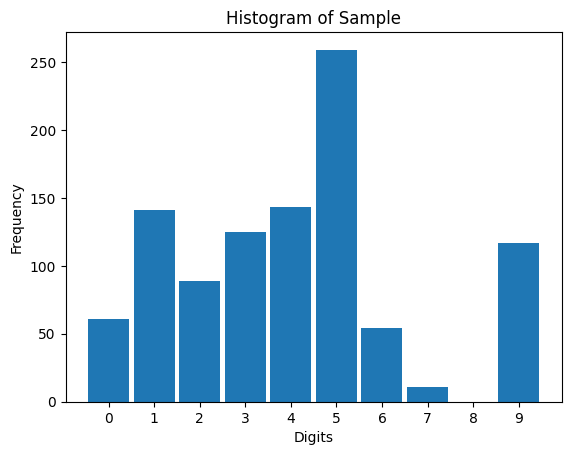

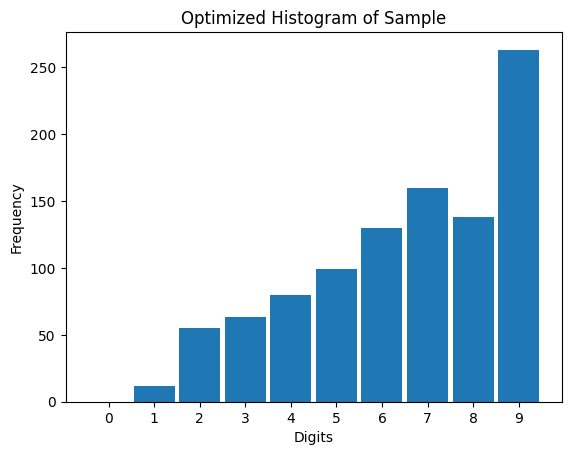

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.arange(10)
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
weights = np.array(weights) / sum(weights)
n = 1000
sample = np.random.choice(digits, size = n, p = weights)

plt.hist(sample, bins = range(11), align = 'left', rwidth = 0.9)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Histogram of Sample')
plt.xticks(range(10))
plt.show()

s_weights = np.array(weights)[np.argsort(weights)]
sample = np.random.choice(digits, size = n, p = s_weights)

plt.hist(sample, bins = range(11), align = 'left', rwidth = 0.9)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Optimized Histogram of Sample')
plt.xticks(range(10))
plt.show()

Задание 5.

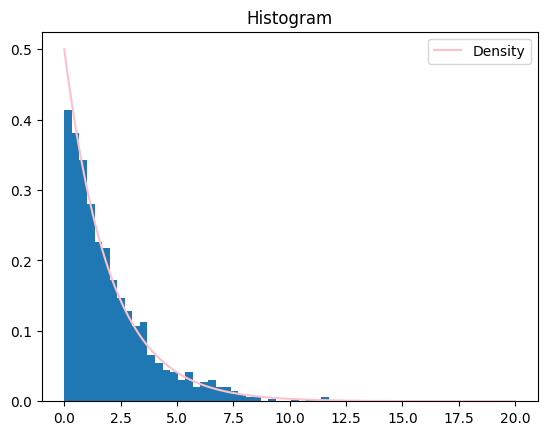

In [ ]:
lambdaa = 0.5

uniform_samples = np.random.rand(1000)

exponential_samples = -np.log(1 - uniform_samples) / lambdaa

plt.hist(exponential_samples, bins = 35, density = True)

x = np.linspace(0, 20, 1000)
y = lambdaa * np.exp(-lambdaa * x)
plt.plot(x, y, color = 'pink', label = 'Density')
plt.title('Histogram')
plt.legend()
plt.show()

Задание 6.